In [ ]:
#Step 1: Import Needed Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
#Step 2: Read the experimental dataset
data = pd.read_csv('/content/smoking.csv')
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [ ]:
#Step 3: Perform Data Pre-processing Steps - Convert the categorical columns to numerical
# Convert values in the "gender","oral","tartar" columns to numerical values
data["gender"] = data["gender"].map({"M": 1, "F": 0}.get)
data["oral"] = data["oral"].map({"Y": 1, "N": 0}.get)
data["tartar"] = data["tartar"].map({"Y": 1, "N": 0}.get)

data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1,0
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,1,0,1,0
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,1,0,0,1
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,1,0,1,0
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,1,0,0,0


In [ ]:
#Check if the dataset is balance or not
data['smoking'].value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

In [ ]:
#Step 4: Split the Data into Training and Test Sets
X = data.drop('smoking', axis=1)
y = data['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
#Step 5: Apply Decision Tree
# Train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Calculate the accuracy, precision, and recall of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

In [ ]:
#Step 6: Evaluate the performance of DT model and visualize results

# 6.1.Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7682915881138342
Precision: 0.684596577017115
Recall: 0.684429234905891
F1 Score: 0.684512895734018


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# 6.1.Print the metrics in another way
print("Decision Tree Performance:\n")
print(classification_report(y_test, y_pred))

Decision Tree Performance:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7048
           1       0.68      0.68      0.68      4091

    accuracy                           0.77     11139
   macro avg       0.75      0.75      0.75     11139
weighted avg       0.77      0.77      0.77     11139



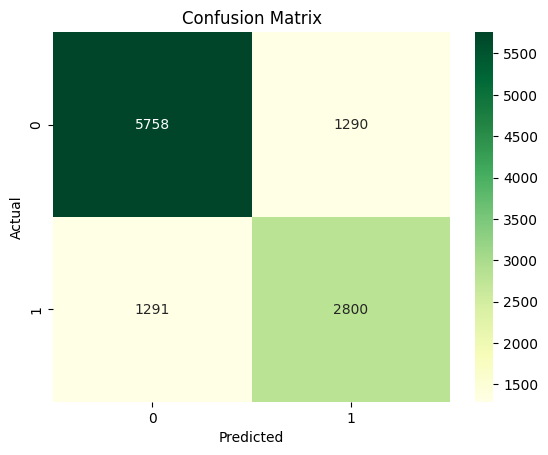

In [ ]:
# 6.2.Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, cmap='YlGn', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
             # للتأكد من القيم  #

# (TN + TP) / (TN + FP + FN + TP)       - Accuracy
# (TP) / (TP + FP)                      - Precision
# (TP) / (TP + FN)                      - Recall
# (2 × Precision × Recall) / (Precision + Recall)          - F1 Score

# EXTRA CAN BE USE 𝑆𝑝𝑒𝑐𝑖𝑓𝑖𝑐𝑖𝑡y
# EXTRA CAN BE USE 𝐸𝑟𝑟𝑜𝑟 𝑅𝑎𝑡e